In [4]:
import pandas as pd

# CSV-Datei einlesen
telefonkunden = pd.read_csv('telefonkunden.csv')

# Die ersten paar Zeilen der Datei anzeigen
print(telefonkunden.head())

   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3  


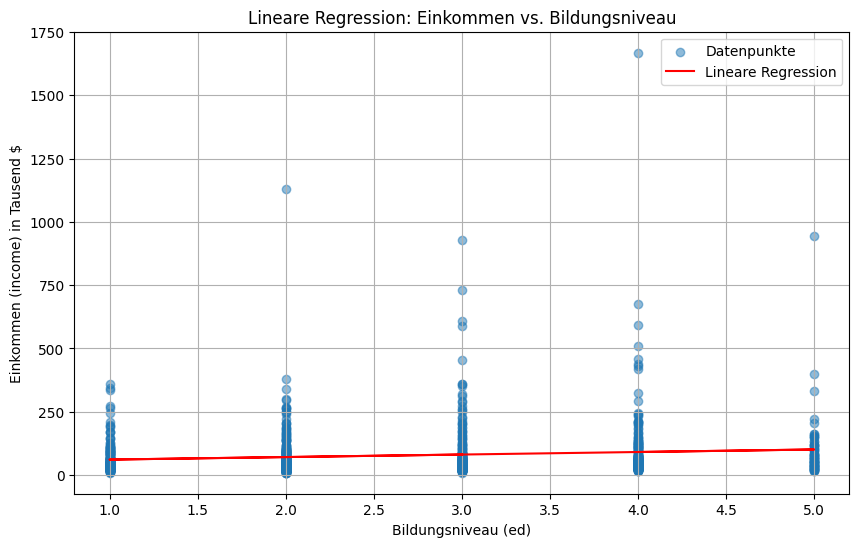

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Scatterplot der Datenpunkte
# Lineare Regression
X = telefonkunden[['ed']].values.reshape(-1, 1)
y = telefonkunden['income'].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)
y_pred = linear_regressor.predict(X)

# Plot der linearen Regression
plt.figure(figsize=(10, 6))
plt.scatter(telefonkunden['ed'], telefonkunden['income'], alpha=0.5, label='Datenpunkte')
plt.plot(telefonkunden['ed'], y_pred, color='red', label='Lineare Regression')
plt.title('Lineare Regression: Einkommen vs. Bildungsniveau')
plt.xlabel('Bildungsniveau (ed)')
plt.ylabel('Einkommen (income) in Tausend $')
plt.legend()
plt.grid(True)
plt.show()


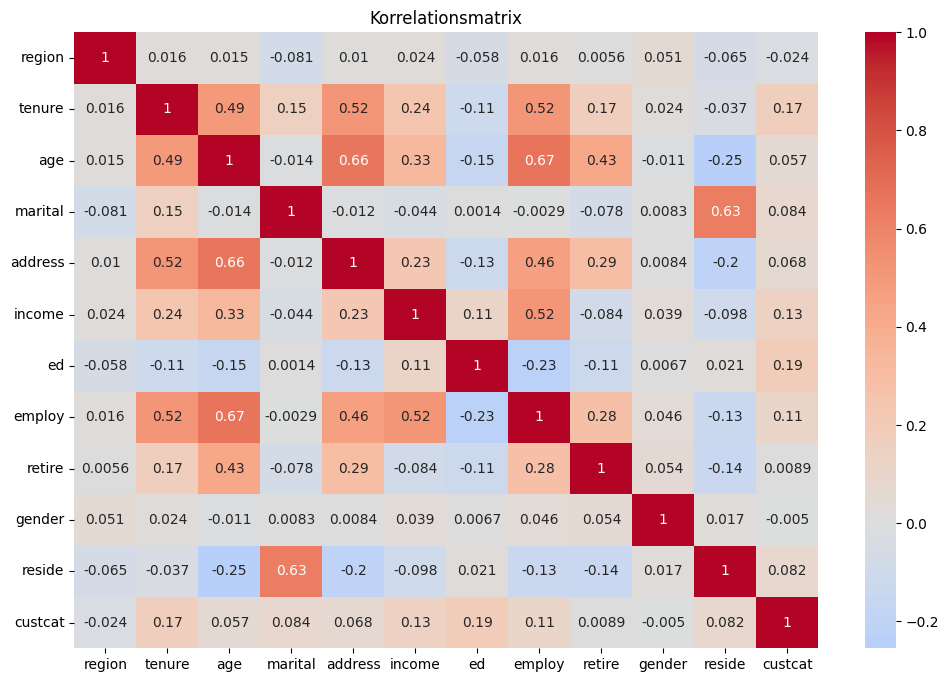

In [19]:
# Korrelationsmatrix
corr = telefonkunden.corr()
plt.figure(figsize=(12, 8))  # Größe der Figur anpassen
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Korrelationsmatrix')
plt.show()

In [26]:
# Median berechnen und zur Tabelle hinzufügen
median = telefonkunden.median()
describe_df = telefonkunden.describe()
describe_df.loc['median'] = median
describe_df


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat,gender_numeric
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000,NaN
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306,NaN
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,NaN
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000,NaN
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000,NaN
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000,NaN
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000,NaN
median,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000,NaN


Gender-Verteilung:
gender
1    517
0    483
Name: count, dtype: int64

Durchschnittliches Einkommen nach Gender:
gender
0    73.250518
1    81.537718
Name: income, dtype: float64


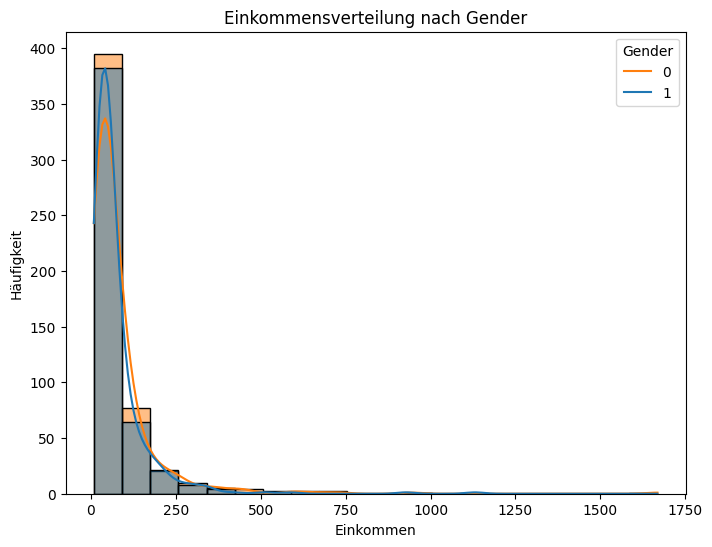

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Grundlegende Übersicht
print("Gender-Verteilung:")
print(telefonkunden['gender'].value_counts())

# Vergleich von Einkommen nach Gender
print("\nDurchschnittliches Einkommen nach Gender:")
print(telefonkunden.groupby('gender')['income'].mean())


# Histogramm: Verteilung von Einkommen nach Gender
plt.figure(figsize=(8, 6))
sns.histplot(data=telefonkunden, x='income', hue='gender', kde=True, bins=20)
plt.title('Einkommensverteilung nach Gender')
plt.xlabel('Einkommen')
plt.ylabel('Häufigkeit')
plt.legend(title='Gender', labels=['0', '1'])
plt.show()


Durchschnittliches Einkommen nach Kundengruppe:
custcat
1    54.759398
2    74.834101
3    89.032028
4    92.000000
Name: income, dtype: float64


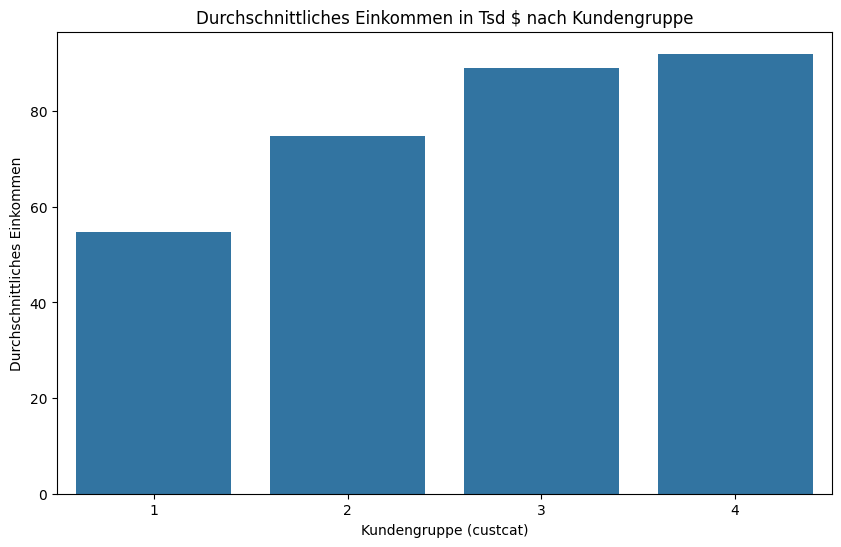

Durchschnittliche Zugehörigkeitsdauer nach Kundengruppe:
custcat
1    24.676692
2    43.345622
3    40.078292
4    35.144068
Name: tenure, dtype: float64


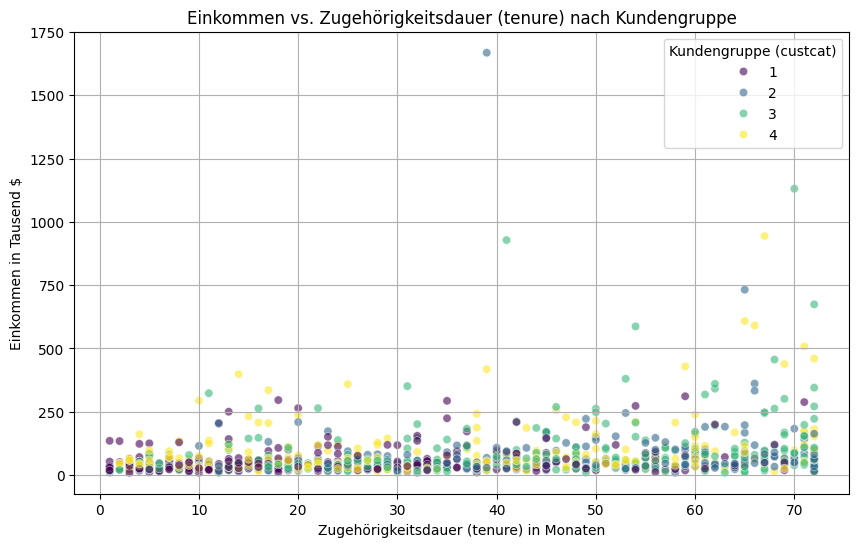

In [35]:
# Durchschnittliches Einkommen nach Kundengruppe (custcat) berechnen
avg_income_by_custcat = telefonkunden.groupby('custcat')['income'].mean()

# Ergebnis anzeigen
print("Durchschnittliches Einkommen nach Kundengruppe:")
print(avg_income_by_custcat)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_income_by_custcat.index, y=avg_income_by_custcat.values)
plt.title('Durchschnittliches Einkommen in Tsd $ nach Kundengruppe')
plt.xlabel('Kundengruppe (custcat)')
plt.ylabel('Durchschnittliches Einkommen')
plt.show()

# Durchschnittliche Zugehörigkeitsdauer (tenure) nach Kundengruppe berechnen
avg_tenure_by_custcat = telefonkunden.groupby('custcat')['tenure'].mean()

# Ergebnis anzeigen
print("Durchschnittliche Zugehörigkeitsdauer nach Kundengruppe:")
print(avg_tenure_by_custcat)

# Scatterplot mit Einkommen und tenure
plt.figure(figsize=(10, 6))
sns.scatterplot(x=telefonkunden['tenure'], y=telefonkunden['income'], hue=telefonkunden['custcat'], palette='viridis', alpha=0.6)
plt.title('Einkommen vs. Zugehörigkeitsdauer (tenure) nach Kundengruppe')
plt.xlabel('Zugehörigkeitsdauer (tenure) in Monaten')
plt.ylabel('Einkommen in Tausend $')
plt.legend(title='Kundengruppe (custcat)')
plt.grid(True)
plt.show()

In [42]:
# Durchschnittswerte der Merkmale je Servicekategorie berechnen
avg_features_by_custcat = telefonkunden.groupby('custcat').mean()

# Ausgabe in einer Tabelle
avg_features_by_custcat

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,gender_numeric
custcat,,,,,,,,,,,,
1,2.090226,24.676692,39.657895,0.417293,9.390977,54.759398,2.364662,8.484962,0.041353,0.507519,2.199248,NaN
2,1.963134,43.345622,41.788018,0.529954,12.571429,74.834101,2.958525,10.576037,0.032258,0.548387,2.336406,NaN
3,1.996441,40.078292,44.430605,0.494662,13.380783,89.032028,2.153025,14.309609,0.078292,0.505338,2.227758,NaN
4,2.029661,35.144068,40.601695,0.550847,10.868644,92.000000,3.368644,10.228814,0.029661,0.512712,2.597458,NaN
